In [1]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/sql/ssl_certs/delete.py
google-cloud-sdk/lib/surface/sql/ssl_certs/describe.py
google-cloud-sdk/lib/surface/sql/ssl_certs/list.py
google-cloud-sdk/lib/surface/sql/tiers/__init__.py
google-cloud-sdk/lib/surface/sql/tiers/list.py
google-cloud-sdk/lib/surface/sql/users/__init__.py
google-cloud-sdk/lib/surface/sql/users/create.py
google-cloud-sdk/lib/surface/sql/users/delete.py
google-cloud-sdk/lib/surface/sql/users/describe.py
google-cloud-sdk/lib/surface/sql/users/list.py
google-cloud-sdk/lib/surface/sql/users/set_password.py
google-cloud-sdk/lib/surface/sql/users/set_password_policy.py
google-cloud-sdk/lib/surface/storage/__init__.py
google-cloud-sdk/lib/surface/storage/buckets/__init__.py
google-cloud-sdk/lib/surface/storage/buckets/add_iam_policy_binding.py
google-cloud-sdk/lib/surface/storage/buckets/anywhere_caches/__init__.py
google-cloud-sdk/lib/surface/storage/buckets/anywhere_caches/create.py
google-

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [2]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
!gcloud config set project 'fa23-i535-vdevaras-jobs2023'

Updated property [core/project].


In [5]:
from google.cloud import storage
import pandas as pd

# Define your storage client
storage_client = storage.Client('fa23-i535-vdevaras-jobs2023')

# Define your bucket name
bucket_name = 'linkedin_jobs_data'

blobs = storage_client.list_blobs(bucket_name)

# Loop through each blob and download the data
for blob in blobs:
    # Get the file name
    file_name = blob.name

    # Create a blob object
    blob = storage_client.get_bucket(bucket_name).blob(file_name)

    # Download the contents of the blob as a string and then parse it using pandas
    blob.download_to_filename('/content/' + file_name)

    # Read the data into a DataFrame
    df_name = 'df_'+ file_name.split('.')[0]
    globals()[df_name] = pd.read_csv('/content/' + file_name)
    print("Loaded: ", df_name)


Loaded:  df_benefits
Loaded:  df_companies
Loaded:  df_company_industries
Loaded:  df_company_specialities
Loaded:  df_employee_counts
Loaded:  df_industries
Loaded:  df_job_industries
Loaded:  df_job_postings
Loaded:  df_job_skills
Loaded:  df_pre_final_data
Loaded:  df_salaries
Loaded:  df_skills


In [6]:
df_benefits = df_benefits.drop('inferred', axis=1)
df_benefits = df_benefits.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index()
df_job_skills = df_job_skills.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index()
df_job_skills = df_job_skills.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index()

data_job = pd.merge(df_job_postings, df_job_skills, on='job_id', how='left')
data_job = pd.merge(data_job, df_benefits, on='job_id', how='left')

,skill_abr,skill_name
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning


In [7]:
df_company_industries = df_company_industries.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index()
df_company_specialities = df_company_specialities.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index()
df_employee_counts = df_employee_counts.groupby('company_id')['time_recorded'].max().reset_index()

df_companies = df_companies.merge(df_company_industries, on="company_id", how="left")
df_companies = df_companies.merge(df_company_specialities, on="company_id", how="left")
df_companies = df_companies.merge(df_employee_counts, on="company_id", how="left")

In [8]:
df_final = data_job.merge(df_companies, on="company_id", how="left")
df_final.head()

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,5.0,New Jersey,US,Somerset,08873,580 Howard Avenue,https://www.linkedin.com/company/hearing-life,Retail,"Digital Hearing Instruments, behind ear, in ea...",1.699131e+09
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,4.0,WI,US,Mayville,53050,1000 Metalcraft Drive,https://www.linkedin.com/company/metalcraft-of...,Industrial Machinery Manufacturing,"Metal Fabrication, Machining, Robotic Welding,...",1.699085e+09
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,4.0,Illinois,US,Wheeling,60090,301E Marquardt Drive,https://www.linkedin.com/company/u.s.-tsubaki-...,Automation Machinery Manufacturing,"Roller Chain, Engineering Class Chain, Sprocke...",1.699086e+09
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,4.0,California,US,Altadena,91001,2212 El Molino Ave,https://www.linkedin.com/company/episcopal-com...,"Non-profit Organization Management, Non-profit...",NaN,1.692864e+09
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,5.0,California,US,Irvine,92618,17400 Laguna Canyon Rd,https://www.linkedin.com/company/iherb,Retail,"Vitamins, Sports Nutrition, Natural Supplement...",1.699064e+09


In [9]:
df_final.shape

(33246, 42)

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33246 entries, 0 to 33245
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description_x               33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

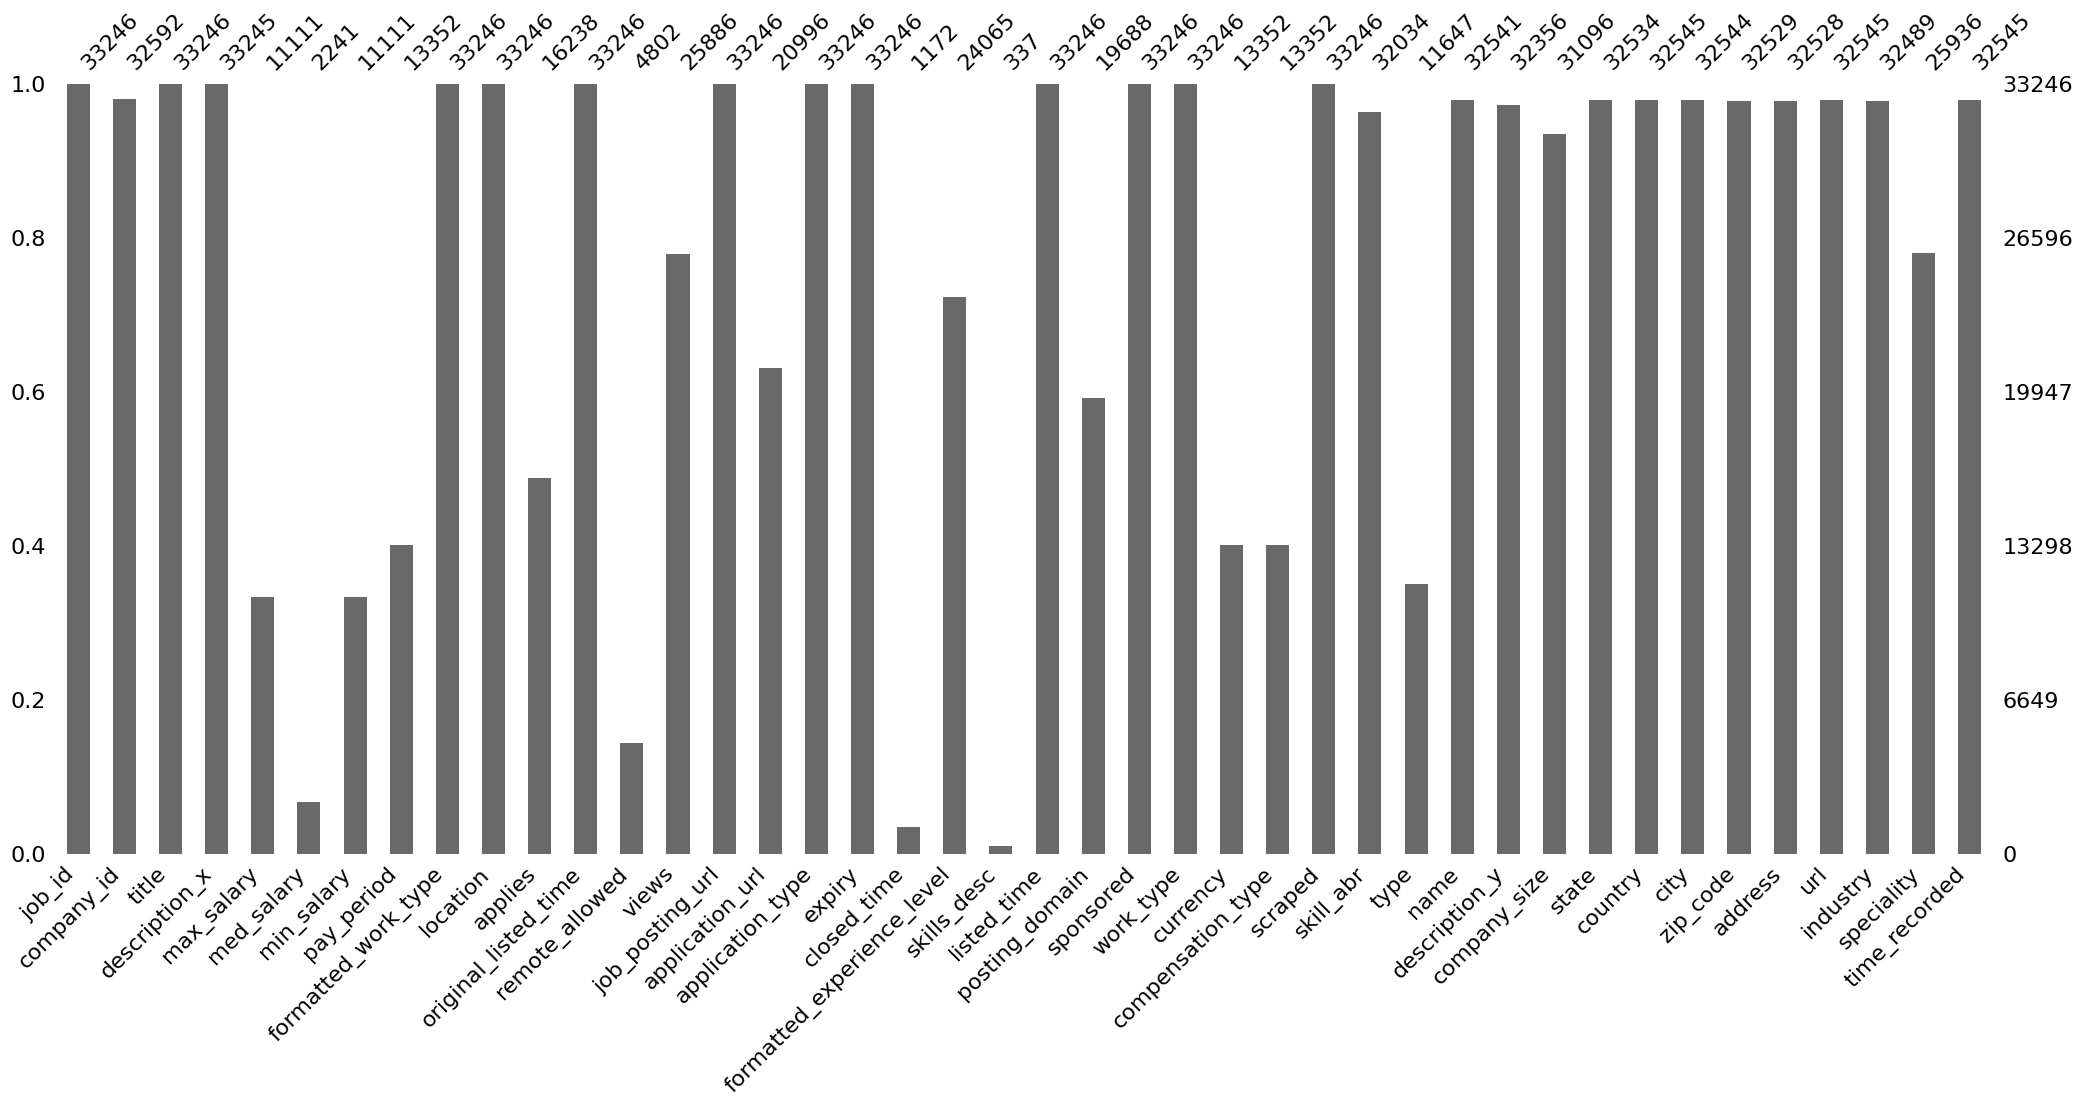

In [11]:
msno.bar(df_final);

In [12]:
#check missing ratio
df_na = (df_final.isnull().sum() / len(df_final)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data

,Missing Ratio
skills_desc,98.986344
closed_time,96.474764
med_salary,93.259339
remote_allowed,85.556157
max_salary,66.579438
min_salary,66.579438
type,64.967214
compensation_type,59.838778
pay_period,59.838778
currency,59.838778


In [13]:
# Drop columns with less than 80% non-null values
df_final_copy = df_final.copy()
threshold = 0.8 * len(df_final_copy)
df_final_copy = df_final_copy.dropna(axis=1, thresh=threshold)

# Drop unnecessary columns
df_final_copy = df_final_copy.drop(columns=['job_id', 'company_id', 'location', 'original_listed_time', 'job_posting_url', 'expiry', 'listed_time','zip_code', 'address', 'url', 'time_recorded', 'formatted_work_type'])

# Replace all instances of "0" with "Unknown" in columns: 'State', 'Country', 'City'
df_final_copy['state'] = df_final_copy['state'].str.replace("0", "Unknown", case=False, regex=False)
df_final_copy['country'] = df_final_copy['country'].str.replace("0", "Unknown", case=False, regex=False)
df_final_copy['city'] = df_final_copy['city'].str.replace("0", "Unknown", case=False, regex=False)

# Replace '_' with space in column names and title case them
df_final_copy.columns = df_final_copy.columns.str.replace('_', ' ').str.title()

# Derive column 'Skill' from column: 'Skill Abr'
# Transform based on the following examples:
#    Skill Abr     Output
# 1: "SALE, BD" => "SALE"
df_final_copy.insert(6, "Skill", df_final_copy["Skill Abr"].str.split(",").str[0])

# Change column type to string for column: 'Skill'
df_final_copy = df_final_copy.astype({'Skill': 'string'})

# Drop column: 'Skill Abr'
df_final_copy = df_final_copy.drop(columns=['Skill Abr'])


In [14]:
# Mapping columns
column_mapping = {
    'Title': 'Job Title',
    'Description X': 'Job Description',
    'Application Type': 'Application Method',
    'Sponsored': 'Is Sponsored',
    'Name': 'Company Name',
    'Description Y': 'Additional Description'
}

df_final_copy = df_final_copy.rename(columns=column_mapping)

In [15]:
df_final_clean = df_final_copy.copy()
df_final_clean = df_final_clean.dropna()
df_final_clean.shape

(30137, 14)

In [16]:
cat_columns =df_final_clean.select_dtypes(include = ['object','string']).columns
cat_columns

Index(['Job Title', 'Job Description', 'Application Method', 'Work Type',
       'Skill', 'Company Name', 'Additional Description', 'State', 'Country',
       'City', 'Industry'],
      dtype='object')

In [17]:
# Select float and int64 string datatype columns from df
num_columns = df_final_clean.select_dtypes(include = ['float', 'int64']).columns
num_columns

Index(['Is Sponsored', 'Scraped', 'Company Size'], dtype='object')

In [19]:
df_final_clean = df_final_clean.drop('Job Description', axis=1)

In [20]:
df_final_clean = df_final_clean.drop(columns= ['Additional Description'])

In [22]:
df_final_clean['Company Size'] = df_final_clean['Company Size'].astype(int)
df_final_clean['Company Size'] = df_final_clean['Company Size'].astype('category')


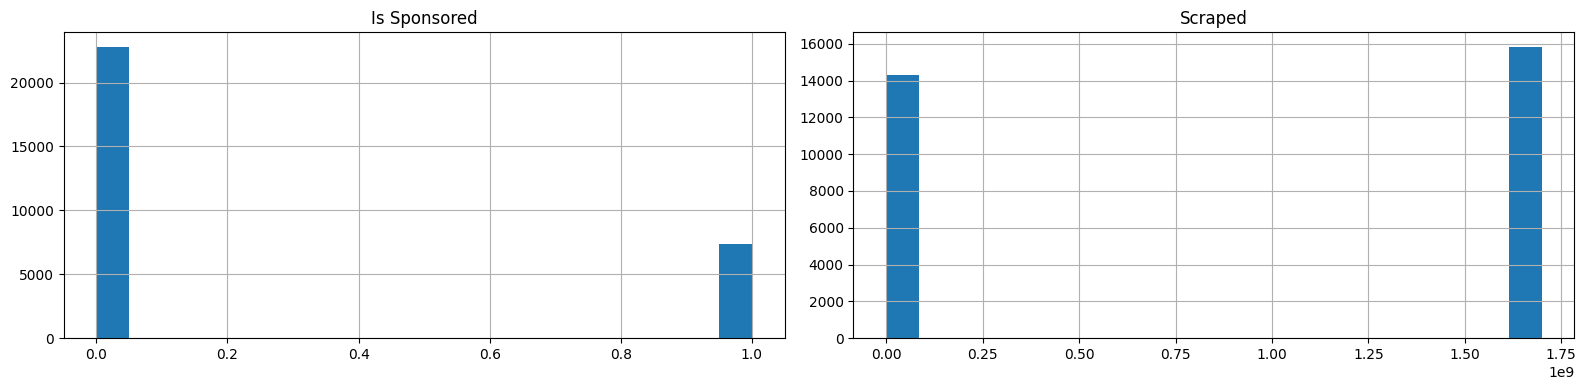

In [23]:
df_final_clean.hist(layout=(1, 2), bins=20, figsize=(16, 4))
plt.tight_layout()
plt.show()

In [88]:
df_final_clean.to_csv('pre_final_data.csv', index=False)

# Upload the preprocessed file to the bucket
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob('pre_final_data.csv')
blob.upload_from_filename('pre_final_data.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

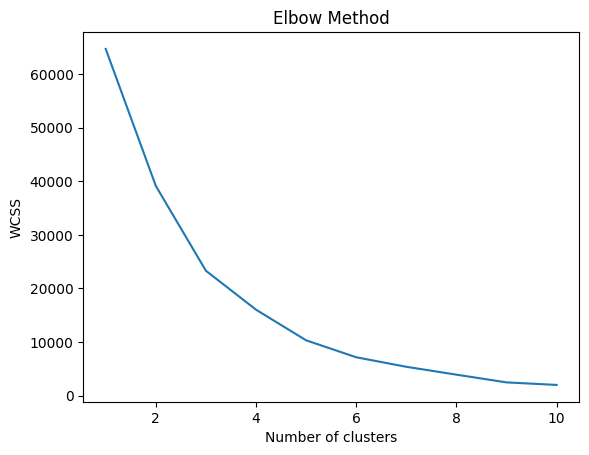

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Load the data
df = df_final_clean.copy()

# Selecting relevant numerical features or encoding categorical variables
# For example, if 'Industry' is a categorical variable, we can encode it using Label Encoding or One-Hot Encoding.
# Assuming 'Industry' and 'Work Type' are the only categorical variables
df['Industry_encoded'] = preprocessing.LabelEncoder().fit_transform(df['Industry'])
df['Work_Type_encoded'] = preprocessing.LabelEncoder().fit_transform(df['Work Type'])

# Selecting a subset of features for clustering
features = df[num_columns]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reducing the dimensionality (Optional, depending on the number of features)
pca = PCA(n_components=2)  # or any other appropriate number of components
reduced_features = pca.fit_transform(scaled_features)

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):  # Assuming we are testing 1-10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow method to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming the optimal number of clusters is found to be 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

# Add the cluster labels to the dataframe
df['Cluster_Labels'] = cluster_labels

# Now df has an additional column 'Cluster_Labels' that shows the cluster each job posting belongs to.
